In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender imageio==2.4.1 atari-py==0.2.6 gym==0.17.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.7 MB/s 
     |████████████████████████████████| 790 kB 59.5 MB/s 
     |████████████████████████████████| 1.6 MB 56.8 MB/s 
     |████████████████████████████████| 1.0 MB 64.9 MB/s 
Reason for being yanked: re-release with new wheels
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=7b6e02bea06112ddfb3446f5c93e6bfd08800e505e3765ee77d0bde97ff94cbf
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
  Created wheel for atari-py: filename=atari_py-0.2.6-cp38-cp38-linux_x86_64.whl size=3093083 sha256=8b4ccd07384618a9b7f6ce7509949b7d4e74eb2f6e98a3c21f956b63017559a7
  Stored in directory: /root/.cache/pip/wheels/7f/5e/27/2e90b9887063d82ee2f9f8b2f8db76bb2290aa281dc40449c8
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654651 sha256=52

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
# !pip install ptan pytorch-ignite pybullet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.7 MB/s 


In [ ]:
!pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 1.13.0+cu116
Uninstalling torch-1.13.0+cu116:
  Successfully uninstalled torch-1.13.0+cu116
Found existing installation: torchvision 0.14.0+cu116
Uninstalling torchvision-0.14.0+cu116:
  Successfully uninstalled torchvision-0.14.0+cu116
Found existing installation: torchaudio 0.13.0+cu116
Uninstalling torchaudio-0.13.0+cu116:
  Successfully uninstalled torchaudio-0.13.0+cu116


In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:35tcmalloc: large alloc 1147494400 bytes == 0x39f2e000 @  0x7f909f1f4615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:54tcmalloc: large alloc 1434370048 bytes == 0x7e584000 @  0x7f909f1f4615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█████████████████████▋          | 

In [ ]:
import collections
from typing import Union
import math
import random
from copy import deepcopy
from typing import Optional

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import gym
from gym.spaces import Box
from gym.wrappers import FrameStack
from colabgymrender.recorder import Recorder
from fastprogress import progress_bar as pb
import matplotlib.pyplot as plt

In [ ]:
class ReplayBuffer:

    def __init__(self, max_size: int):
        self._buf = collections.deque(maxlen=max_size)

    def append(
        self,
        state: np.ndarray,
        action: int,
        reward: Union[int, float],
        done: bool,
        next_state: np.ndarray,
    ) -> None:
        self._buf.append(
            (state, action, reward, done, next_state)
        )

    def sample(self, size: int):
        sampled_indices = np.random.choice(len(self.buffer), size, replace=False)
        states, actions, rewards, dones, next_states = \
            zip(*[self.buffer[idx] for idx in sampled_indices])
        return np.array(states), np.array(actions), \
               np.array(rewards, dtype=np.float32), \
               np.array(dones, dtype=np.uint8), \
               np.array(next_states)

In [ ]:
class NStepPriorityReplayBuffer:

    def __init__(
        self,
        max_size: int,
        prob_alpha: float = 0.6,
        beta_start: float = 0.4,
        beta_frames: float = 100000,
        n_step: int = 4,
        gamma: float = 0.99,
    ):
        self._prob_alpha = prob_alpha
        self._max_size = max_size
        self._pos = 0
        self._buf = []
        self._priorities = np.zeros((max_size,), dtype=np.float32)
        self._beta_start = beta_start
        self._beta = beta_start
        self._beta_frames = beta_frames
        self._n_step = n_step
        self._gamma = gamma
        self._total_discounted_rewards = np.array([np.nan]*max_size)
        self._last_states = [np.nan]*max_size

    def update_bata(self, idx) -> None:
        beta = self._beta_start + idx * (1.0 - self._beta_start) / self._beta_frames
        self._beta = min(1.0, beta)
        return self._beta

    def __len__(self):
        return len(self._buf)

    def append(
        self,
        state: np.ndarray,
        action: int,
        reward: Union[int, float],
        done: bool,
        next_state: np.ndarray,
    ) -> None:
        max_prio = self._priorities.max() if self._buf else 1.0
        if len(self._buf) < self._max_size:
            self._buf.append(
                (state, action, reward, done, next_state)
            )
        else:
            self._buf[self._pos] = (state, action, reward, done, next_state)
        self._priorities[self._pos] = max_prio

        if len(self._buf) >= self._n_step:
            dis_r = 0.0
            last_state = self._buf[self._pos][0]
            for i in range(self._n_step):
                state, _, r, done, _ = self._buf[self._pos - i]
                dis_r = r + self._gamma * dis_r
                if done:
                    last_state = state
                    dis_r = r  # ※
                self._total_discounted_rewards[self._pos - i] = dis_r
                self._last_states[self._pos - i] = last_state
            
            for i in range(self._n_step-1):
                done = self._buf[self._pos - i][3]
                if done:
                    break
                self._total_discounted_rewards[self._pos - i] = np.nan
                self._last_states[self._pos - i] = np.nan

        self._pos = (self._pos + 1) % self._max_size

    def sample(self, size: int):
        sample_target_indices = np.where(~np.isnan(self._total_discounted_rewards[:len(self._buf)]))[0]
        # prios = self._priorities[sample_target_indices]  #self._priorities if len(self._buf) == self._max_size else self._priorities[:self._pos]
        prios = self._priorities
        probs = prios * self._prob_alpha
        # probs /= np.nan_to_num(probs, 0.0).sum()
        probs /= probs[sample_target_indices].sum()
        sampled_indices = np.random.choice(
            sample_target_indices,
            # np.where(~np.isnan(self._total_discounted_rewards[:len(self._buf)]))[0],
            size, p=probs[sample_target_indices]
        )
        states, actions, rewards, dones, next_states = zip(*[self._buf[idx] for idx in sampled_indices])
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        dones = np.array(dones)
        next_states = np.array(next_states)
        total_discounted_rewards = self._total_discounted_rewards[sampled_indices]
        last_states = np.stack([self._last_states[idx] for idx in sampled_indices])
        total = len(self._buf)
        weights = np.array((total * probs[sampled_indices]) ** (-self._beta), dtype=np.float32)
        # weights = np.array((total * probs) ** (-self._beta), dtype=np.float32)
        weights /= weights.max()
        return states, actions, rewards, dones, total_discounted_rewards, last_states, sampled_indices, weights

    def update_priorities(self, sample_indices: np.ndarray, sample_priorities: np.ndarray) -> None:
        self._priorities[sample_indices] = sample_priorities

    @property
    def gamma(self) -> float:
        return self._gamma

    @property
    def n_step(self) -> float:
        return self._n_step

In [ ]:
class NoisyLinear(nn.Linear):

    def __init__(self, in_features, out_features, sigma_init=0.017, bias=True):
        super(NoisyLinear, self).__init__(in_features, out_features, bias=bias)
        w = torch.full((out_features, in_features), sigma_init)
        self._sigma_weight = nn.Parameter(w)
        z = torch.zeros(out_features, in_features)
        self.register_buffer("epsilon_weight", z)
        if bias:
            w = torch.full((out_features,), sigma_init)
            self._sigma_bias = nn.Parameter(w)
            z = torch.zeros(out_features)
            self.register_buffer("epsilon_bias", z)
        self.reset_parameters()

    def reset_parameters(self):
        std = math.sqrt(3 / self.in_features)
        self.weight.data.uniform_(-std, std)
        self.bias.data.uniform_(-std, std)

    def forward(self, input):
        self.epsilon_weight.normal_()
        bias = self.bias
        if bias is not None:
            self.epsilon_bias.normal_()
            bias = bias + self._sigma_bias * \
                   self.epsilon_bias.data
        v = self._sigma_weight * self.epsilon_weight.data + \
            self.weight
        return F.linear(input, v, bias)

In [ ]:
class RainbowDQN(nn.Module):

    def __init__(self, input_shape: np.ndarray, n_actions: int):
        super(RainbowDQN, self).__init__()

        self._conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )

        conv_out_dim = int(np.prod(
            self._conv(torch.zeros(1, *input_shape)).size()
        ))
        self._fc_adv = nn.Sequential(
            NoisyLinear(conv_out_dim, 256),
            nn.ReLU(),
            nn.Linear(256, n_actions)
        )
        self._fc_val = nn.Sequential(
            nn.Linear(conv_out_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        # norm = 256
        # conv_out = self._conv(x / norm).view(x.size()[0], -1)
        conv_out = self._conv(x).view(x.size()[0], -1)
        adv = self._fc_adv(conv_out)
        val = self._fc_val(conv_out)
        return val - (adv - adv.mean(dim=1, keepdim=True))
        # return val, adv

In [ ]:
def rainbow_loss(
    states: np.ndarray,
    actions: np.ndarray,
    total_discounted_rewards: np.ndarray,
    dones: np.ndarray,
    last_states: np.ndarray,
    weights: np.ndarray,
    net: nn.Module,
    tgt_net: nn.Module,
    n_step_gamma: float,
    double: bool = True,
    device: str = 'cuda' if torch.cuda.is_available() else 'cpu',
):
    states_v = torch.tensor(states).to(device)
    actions_v = torch.tensor(actions).to(device)
    discounted_rewards_v = torch.tensor(total_discounted_rewards).to(device)
    done_mask = torch.BoolTensor(dones).to(device)
    weights_v = torch.tensor(weights).to(device)

    actions_v = actions_v.unsqueeze(-1)
    state_action_values = net(states_v).gather(1, actions_v)
    state_action_values = state_action_values.squeeze(-1)
    with torch.no_grad():
        last_states_v = torch.tensor(last_states).to(device)
        if double:
            last_state_actions = net(last_states_v).max(1)[1]
            last_state_actions = last_state_actions.unsqueeze(-1)
            last_state_values = tgt_net(last_states_v).gather(1, last_state_actions).squeeze(-1)
        else:
            last_state_values = tgt_net(last_states_v).max(1)[0]
        last_state_values[done_mask] = 0.0
        expected_state_action_values = last_state_values.detach() * n_step_gamma + discounted_rewards_v
    losses_v = (state_action_values - expected_state_action_values) ** 2
    losses_v *= weights_v

    return losses_v.mean(), (losses_v + 1e-5).data.cpu().numpy()

In [ ]:
class Agent:

    def __init__(
        self,
        env,
        exp_buffer: NStepPriorityReplayBuffer,
        net: nn.Module,
        epsilon_start: float = 1.0,
        epsilon_final: float = 0.01,
        epsilon_decay_last_step: int = 200000,
        tgt_sync_steps: int = 10000,
        learning_rate: float = 1e-4,
        device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
    ):
        self._env = env
        self._exp_buffer = exp_buffer
        self._net = net
        self._tgt_net = deepcopy(net)
        for p in self._tgt_net.parameters():
            p.requires_grad = False
        self._epsilon_start = epsilon_start
        self._epsilon_final = epsilon_final
        self._epsilon_decay_last_step = epsilon_decay_last_step
        self._epsilon = epsilon_start
        self._device = device
        self._total_step = 0
        self._total_trained_samples = 0
        self._tgt_sync_steps = tgt_sync_steps
        self._optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
        self._reset_episode()

    def _reset_episode(self):
        self._state = self._env.reset()
        self._total_reward = 0.0

    @torch.no_grad()
    def play_step(self, epsilon: Optional[float] = None):
        if epsilon is None:
            epsilon = self._epsilon
        done_reward = None

        if np.random.random() < epsilon:
            action = self._env.action_space.sample()
        else:
            state_a = np.array([self._state], copy=False)
            state_v = torch.tensor(state_a).to(self._device)
            q_vals_v = self._net(state_v)
            _, act_v = torch.max(q_vals_v, dim=1)
            action = int(act_v.item())

        next_state, reward, is_done, _ = self._env.step(action)
        self._total_reward += reward

        self._exp_buffer.append(
            self._state, action, reward, is_done, next_state
        )
        self._state = next_state
        if is_done:
            done_reward = self._total_reward
            self._reset_episode()

        self._total_step += 1
        self._update_epsilon(self._total_step)
        self._exp_buffer.update_bata(self._total_step)

        if self._total_step % self._tgt_sync_steps == 0:
            self._tgt_net.load_state_dict(self._net.state_dict())
            print(f'synced target net')

        return done_reward

    def train(self, n_iter: int = 1, batch_size: int = 32) -> None:
        for i in range(n_iter):
            states, actions, rewards, dones, total_discounted_rewards, \
                last_states, sampled_indices, weights = self._exp_buffer.sample(batch_size)
            self._optimizer.zero_grad()
            loss_v, prios = rainbow_loss(
                states=states,
                actions=actions,
                total_discounted_rewards=total_discounted_rewards,
                dones=dones,
                last_states=last_states,
                weights=weights,
                net=self._net,
                tgt_net=self._tgt_net,
                n_step_gamma=self._exp_buffer.gamma ** self._exp_buffer.n_step
            )
            loss_v.backward()
            self._optimizer.step()
            self._exp_buffer.update_priorities(sampled_indices, prios)
            self._total_trained_samples += batch_size

    def initial_exploration(self, n_steps: int = 10000, epsilon: float = 1.0) -> None:
        eps_bak = self._epsilon
        for i in pb(range(n_steps)):
            self._epsilon = epsilon
            self.play_step()
        self._total_step = 0
        self._epsilon = eps_bak

    def _update_epsilon(self, step_index: int) -> None:
        self._epsilon = max(
            self._epsilon_final,
            self._epsilon_start - step_index / self._epsilon_decay_last_step
        )

In [ ]:
class SkipFrame(gym.Wrapper):
    def __init__(self, env, skip):
        super().__init__(env)
        self._skip = skip

    def step(self, action):
        total_reward = 0.0
        done = False
        for i in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            total_reward += reward
            if done:
                break
        return obs, total_reward, done, info


class GrayScaleObservation(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        obs_shape = self.observation_space.shape[:2]
        self.observation_space = Box(low=0, high=255, shape=obs_shape, dtype=np.uint8)

    def permute_orientation(self, observation):
        observation = np.transpose(observation, (2, 0, 1))
        observation = torch.tensor(observation.copy(), dtype=torch.float)
        return observation

    def observation(self, observation):
        observation = self.permute_orientation(observation)
        transform = T.Grayscale()
        observation = transform(observation)
        return observation


class ResizeObservation(gym.ObservationWrapper):
    def __init__(self, env, shape):
        super().__init__(env)
        if isinstance(shape, int):
            self.shape = (shape, shape)
        else:
            self.shape = tuple(shape)

        obs_shape = self.shape + self.observation_space.shape[2:]
        self.observation_space = Box(low=0, high=255, shape=obs_shape, dtype=np.uint8)

    def observation(self, observation):
        transforms = T.Compose(
            [T.Resize(self.shape), T.Normalize(0, 255)]
        )
        observation = transforms(observation).squeeze(0)
        return observation


class LazyFramesToNumpy(gym.ObservationWrapper):
    def __init__(self, env):
        super(LazyFramesToNumpy, self).__init__(env)

    def observation(self, observation):
        return observation.__array__()

In [ ]:
SEED = 77

In [ ]:
random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

!rm -rf /content/video

env = gym.make("Breakout-v0")
env = SkipFrame(env, skip=4)
env = GrayScaleObservation(env)
env = ResizeObservation(env, shape=224)
env = FrameStack(env, num_stack=4)
env = LazyFramesToNumpy(env)
directory = './video'
env = Recorder(env, directory)

In [ ]:
net = RainbowDQN(env.observation_space.shape, env.action_space.n).to(device)

In [ ]:
env.action_space.n

4

In [ ]:
state = env.reset()

In [ ]:
state.max()

0.58158356

In [ ]:
state.shape

(4, 224, 224)

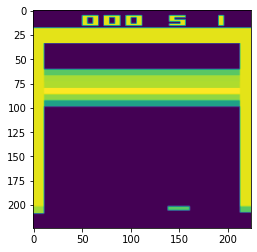

In [ ]:
plt.imshow(state[0], cmap='gray')

In [ ]:
net(torch.tensor(state).unsqueeze(0).to(device))

tensor([[-0.0179,  0.0397,  0.0255,  0.0609]], device='cuda:0',
       grad_fn=<SubBackward0>)

In [ ]:
exp_buffer = NStepPriorityReplayBuffer(
    max_size=10000,
    prob_alpha=0.6,
    beta_start=0.4,
    beta_frames=50000, #100000,
    n_step=4,
    gamma=0.99,
)
agent = Agent(
    env=env,
    exp_buffer=exp_buffer,
    net=net,
    epsilon_start=0.6,
    epsilon_final=0.01,
    epsilon_decay_last_step=50000, #200000,
    tgt_sync_steps=1000,
    learning_rate=1e-4,
    device=device
)

In [ ]:
agent.initial_exploration(n_steps=10000)

synced target net
synced target net
synced target net
synced target net
synced target net
synced target net
synced target net
synced target net
synced target net
synced target net


In [ ]:
states, actions, rewards, dones, next_states = zip(*agent._exp_buffer._buf)

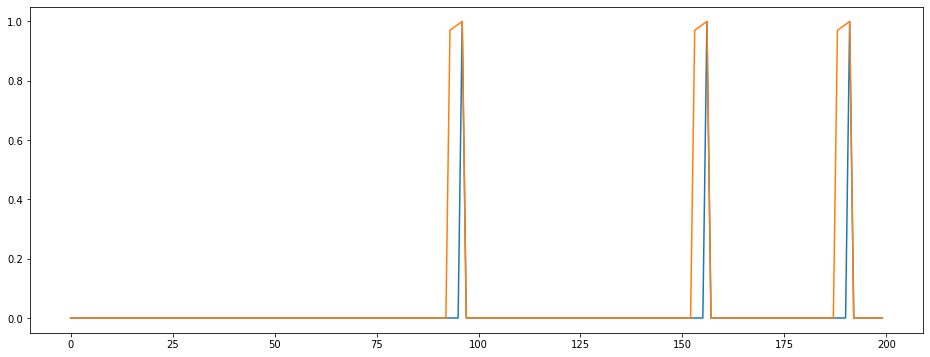

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(rewards[:200])
plt.plot(agent._exp_buffer._total_discounted_rewards[:200])

In [ ]:
!rm -rf /content/video/*

In [ ]:
# env = gym.make("Breakout-v0")
# env = SkipFrame(env, skip=4)
# env = GrayScaleObservation(env)
# env = ResizeObservation(env, shape=224)
# env = FrameStack(env, num_stack=4)
# env = LazyFramesToNumpy(env)
# exp_buffer = NStepPriorityReplayBuffer(
#     max_size=10000,
#     prob_alpha=0.6,
#     beta_start=0.4,
#     beta_frames=50000, #100000,
#     n_step=4,
#     gamma=0.99,
# )
# agent = Agent(
#     env=env,
#     exp_buffer=exp_buffer,
#     net=net,
#     epsilon_start=0.6,
#     epsilon_final=0.01,
#     epsilon_decay_last_step=50000, #200000,
#     tgt_sync_steps=1000,
#     learning_rate=1e-4,
#     device=device
# )

episode = 0

while True:

    for stp in range(20):
        done_reward = agent.play_step()
        if done_reward is not None:
            print(f'episode : {episode}, done reward : {done_reward}, total_step : {agent._total_step}, cur_epsilon : {agent._epsilon}')
            episode += 1
    
    agent.train(n_iter=20, batch_size=32)

episode : 0, done reward : 1.0, total_step : 38, cur_epsilon : 0.59924
episode : 1, done reward : 1.0, total_step : 116, cur_epsilon : 0.59768
episode : 2, done reward : 0.0, total_step : 169, cur_epsilon : 0.5966199999999999
episode : 3, done reward : 1.0, total_step : 235, cur_epsilon : 0.5952999999999999
episode : 4, done reward : 2.0, total_step : 325, cur_epsilon : 0.5935
episode : 5, done reward : 2.0, total_step : 407, cur_epsilon : 0.5918599999999999
episode : 6, done reward : 3.0, total_step : 492, cur_epsilon : 0.59016
episode : 7, done reward : 2.0, total_step : 573, cur_epsilon : 0.58854
episode : 8, done reward : 1.0, total_step : 644, cur_epsilon : 0.58712
episode : 9, done reward : 0.0, total_step : 715, cur_epsilon : 0.5857
episode : 10, done reward : 2.0, total_step : 803, cur_epsilon : 0.58394
episode : 11, done reward : 2.0, total_step : 884, cur_epsilon : 0.58232
episode : 12, done reward : 3.0, total_step : 990, cur_epsilon : 0.5801999999999999
synced target net
ep

In [ ]:
# env = gym.make("Breakout-v0")
# env = SkipFrame(env, skip=4)
# env = GrayScaleObservation(env)
# env = ResizeObservation(env, shape=84)
# env = FrameStack(env, num_stack=4)
# env = LazyFramesToNumpy(env)
# exp_buffer = NStepPriorityReplayBuffer(
#     max_size=30000,
#     prob_alpha=0.6,
#     beta_start=0.4,
#     beta_frames=20000, #100000,
#     n_step=4,
#     gamma=0.99,
# )
# agent = Agent(
#     env=env,
#     exp_buffer=exp_buffer,
#     net=net,
#     epsilon_start=0.5,
#     epsilon_final=0.01,
#     epsilon_decay_last_step=20000, #200000,
#     tgt_sync_steps=1000,
#     learning_rate=1e-4,
#     device=device
# )

episode = 0

while True:

    for stp in range(100):
        done_reward = agent.play_step()
        if done_reward is not None:
            print(f'episode : {episode}, done reward : {done_reward}, total_step : {agent._total_step}, cur_epsilon : {agent._epsilon}')
            episode += 1
    
    agent.train(n_iter=100, batch_size=32)

episode : 0, done reward : 0.0, total_step : 12, cur_epsilon : 0.4994
episode : 1, done reward : 0.0, total_step : 55, cur_epsilon : 0.49725
episode : 2, done reward : 2.0, total_step : 119, cur_epsilon : 0.49405
episode : 3, done reward : 2.0, total_step : 185, cur_epsilon : 0.49075
episode : 4, done reward : 0.0, total_step : 241, cur_epsilon : 0.48795
episode : 5, done reward : 3.0, total_step : 333, cur_epsilon : 0.48335
episode : 6, done reward : 1.0, total_step : 387, cur_epsilon : 0.48065
episode : 7, done reward : 3.0, total_step : 478, cur_epsilon : 0.4761
episode : 8, done reward : 2.0, total_step : 561, cur_epsilon : 0.47195
episode : 9, done reward : 2.0, total_step : 666, cur_epsilon : 0.4667
episode : 10, done reward : 3.0, total_step : 763, cur_epsilon : 0.46185
episode : 11, done reward : 3.0, total_step : 873, cur_epsilon : 0.45635
episode : 12, done reward : 0.0, total_step : 941, cur_epsilon : 0.45295
synced target net
episode : 13, done reward : 2.0, total_step : 10

KeyboardInterrupt: ignored